Project 3: (10 points)
your total (50 points) will divided by 5 to get 10 points for this project.


In this project, we will focus on the preprocessing step before building the model.

We will prepare data before making a Market basket analysis, which is an algorithm originally designed to help retailers understand and improve their businesses.

Also, we will do some important preprocessing step before building an unsupervised model for Customer Segments.

### Market Basket Analysis
---
Imagine you work for a retailer that sells dozens of products and your boss comes to you and asks the following questions:

* What products are purchased together most frequently?
* How should the products be organized and positioned in the store?
* How do we identify the best products to discount via coupons?
---
##### You might reasonably respond with complete bewilderment, as those questions are very diverse and do not immediately seem answerable using a single algorithm and dataset. However, the answer to all those questions and many more is market basket analysis.
--
### Dataset:
you can find the dataset on Canvas under Dataset section: "Online Retail.xlsx"

### Steps to do:

1- Open a Jupyter notebook.

2- Install the following libraries, if not installed, and then import them:
* matplotlib.pyplot, which is used to plot the results of the models.
* mlxtend.frequent_patterns, which is used to run the models;
* mlxtend.preprocessing, which is used to encode and prep the data for the models;
* numpy, which is used to work with arrays;
* pandas, which is used to work with DataFrames.

In [3]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 14.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [134]:
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy as np
import pandas as pd

3- Loading Data ( 1 point)

Load and view online retail dataset.Once you have downloaded the dataset, save it and note the path.

In [137]:
# write your code here
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


4- Print out the first 10 rows of the DataFrame. ( 1 point)

Notice that the data contains some columns that will not be relevant to market basket analysis:

In [139]:
# write your code here
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


5- Print out the data type for each column in the DataFrame. (1 point)

This information will come in handy when trying to perform specific cleaning tasks. Columns need to be of the correct type in order for filtering and computing to execute as expected:

In [143]:
# write your code here
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

6- Get and print the dimensions of the DataFrame, as well as the number of unique invoice numbers and customer identifications (2 points)

In [146]:
# write your code here
print(df.shape)

unique_invoices = df['InvoiceNo'].nunique()
unique_customers = df['CustomerID'].nunique()

print(f"\nNumber of unique invoice numbers: {unique_invoices:,}")
print(f"Number of unique customer identifications: {unique_customers:,}")

(541909, 8)

Number of unique invoice numbers: 25,900
Number of unique customer identifications: 4,372


7- Data Cleaning and Formatting:

a. Create an indicator column stipulating whether the invoice number begins with "C". Called the column "IsCPresent" ( 1 points)

In [149]:
# write your code here
df['IsCPresent'] = df['InvoiceNo'].astype(str).str.startswith('C').astype(int)

print(df[['InvoiceNo', 'IsCPresent']].head(10))

  InvoiceNo  IsCPresent
0    536365           0
1    536365           0
2    536365           0
3    536365           0
4    536365           0
5    536365           0
6    536365           0
7    536366           0
8    536366           0
9    536367           0


b. (3 points)
- Filter out all transactions having either zero or a negative number of items (in other words, items were returned),
- Remove all invoice numbers starting with "C" using the column created in previous step
- Subset the DataFrame down to InvoiceNo and Description
- Drop all rows with at least one missing value.
- Rename the DataFrame online1 and print out the first 10 rows of the filtered DataFrame, online1.

In [152]:
# write your code here
mask = (df['Quantity'] > 0) & (~df['IsCPresent'])

online1 = (
    df.loc[mask, ['InvoiceNo', 'Description']]
    .dropna(how = 'any')
)

print(online1.head(10))

  InvoiceNo                          Description
0    536365   WHITE HANGING HEART T-LIGHT HOLDER
1    536365                  WHITE METAL LANTERN
2    536365       CREAM CUPID HEARTS COAT HANGER
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE
4    536365       RED WOOLLY HOTTIE WHITE HEART.
5    536365         SET 7 BABUSHKA NESTING BOXES
6    536365    GLASS STAR FROSTED T-LIGHT HOLDER
7    536366               HAND WARMER UNION JACK
8    536366            HAND WARMER RED POLKA DOT
9    536367        ASSORTED COLOUR BIRD ORNAMENT


c. Approximately, how many rows and invoice numbers have already removed? ( 2 points)


### Edit to write your answer here

In [155]:
#write your code here to prove your answer:
original_rows = df.shape[0]
original_invoices = df['InvoiceNo'].nunique()

clean_rows = online1.shape[0]
clean_invoices = online1['InvoiceNo'].nunique()

rows_removed = original_rows - clean_rows
invoices_removed = original_invoices - clean_invoices

print(f"Rows removed: {rows_removed}")
print(f"Invoices removed: {invoices_removed}")

Rows removed: 11216
Invoices removed: 5764


d. (2 points)
- Extract the invoice numbers from the DataFrame as a list.
- Remove duplicate elements to create a list of unique invoice numbers.
- Confirm that the process was successful by printing the length of the list of unique invoice numbers.

In [158]:
# write your code here
invoices_list = online1['InvoiceNo'].tolist()

unique_invoices = list(set(invoices_list))

print(f"Number of unique invoices: {len(unique_invoices)}")

Number of unique invoices: 20136


e. Take the list from step d and cut it to only include the first 5,000 elements. Print out the length of the new list to confirm that it is, in fact, the expected length of 5,000( 1 point)

In [161]:
# write your code here
first_5000_invoices = unique_invoices[:5000]

print(f"Length of first_5000_invoices: {len(first_5000_invoices)}")

Length of first_5000_invoices: 5000


f. Filter the online1 DataFrame down by only keeping the invoice numbers in the list from step e and print out the first 10 rows of online1( 1 point)

In [164]:
# write your code here
online1 = online1[online1['InvoiceNo'].isin(first_5000_invoices)]

print(online1.head(10))

  InvoiceNo                          Description
0    536365   WHITE HANGING HEART T-LIGHT HOLDER
1    536365                  WHITE METAL LANTERN
2    536365       CREAM CUPID HEARTS COAT HANGER
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE
4    536365       RED WOOLLY HOTTIE WHITE HEART.
5    536365         SET 7 BABUSHKA NESTING BOXES
6    536365    GLASS STAR FROSTED T-LIGHT HOLDER
7    536366               HAND WARMER UNION JACK
8    536366            HAND WARMER RED POLKA DOT
9    536367        ASSORTED COLOUR BIRD ORNAMENT


g. Print out the dimensions of the DataFrame (online1) and the number of unique invoice numbers to confirm that the filtering and cleaning process was successful (1 point)

In [167]:
# write your code here
rows, cols = online1.shape
print(f"Online1 dimensions: {rows} rows x {cols} columns")

unique_invoices_count = online1['InvoiceNo'].nunique()
print(f"Unique Invoice Numbers in Online1: {unique_invoices_count}")

Online1 dimensions: 133315 rows x 2 columns
Unique Invoice Numbers in Online1: 5000


h. Transform the data in online1 into the aforementioned list of lists called invoice_item_list. The process for doing this is to iterate over the unique invoice numbers and, at each iteration, extract the item descriptions as a list and append that list to the larger invoice_item_list list. Print out elements one through four of the list (2 points)

In [170]:
# write your code here
invoice_item_list = []

for invoice in first_5000_invoices:
    items = online1.loc[online1['InvoiceNo'] == invoice, 'Description'].tolist()
    invoice_item_list.append(items)

for idx, item_list in enumerate(invoice_item_list[:4], start=1):
    print(f"\nInvoice {idx} items: {item_list}")


Invoice 1 items: ['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER']

Invoice 2 items: ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT']

Invoice 3 items: ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND']

Invoice 4 items: ['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION']


8- Data Encoding

While cleaning the data is crucial, the most important part of the data preparation process is molding the data into the correct form. Before running the models, the data, currently in the list of lists form, needs to be encoded and recast as a DataFrame.

To do this, we will leverage TransactionEncoder from the preprocessing module of mlxtend. The output from the encoder is a multidimensional array, where each row is the length of the total number of unique items in the transaction dataset and the elements are Boolean variables, indicating whether that particular item is linked to the invoice number that row represents. With the data encoded, we can recast it as a DataFrame where the rows are the invoice numbers and the columns are the unique items in the transaction dataset.

The data encoding will be done using mlxtend, but if you wish to encode the data without using a package, you are free.

More info about mlxtend in the link: https://rasbt.github.io/mlxtend/

a. Initialize and fit the transaction encoder. Print out an example of the resulting data. (2 points)

In [172]:
# write your code here
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()

te_ary = te.fit(invoice_item_list).transform(invoice_item_list)

df_encoded = pd.DataFrame(te_ary,
                          index=first_5000_invoices,
                          columns = te.columns_)

print(df_encoded.iloc[:5, :5])

         4 PURPLE FLOCK DINNER CANDLES   OVAL WALL MIRROR DIAMANTE   \
536365                           False                        False   
536366                           False                        False   
536367                           False                        False   
536368                           False                        False   
536369                           False                        False   

         SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
536365                             False                    False   
536366                             False                    False   
536367                             False                    False   
536368                             False                    False   
536369                             False                    False   

        *Boombox Ipod Classic  
536365                  False  
536366                  False  
536367                  False  
536368                  False 

b. Recast the encoded array as a DataFrame named online_encoder_df. Print the predefined subset of the DataFrame that features both True and False values (2 points)

In [174]:
# write your code here
online_encoder_df = pd.DataFrame(
    te_ary,
    index=first_5000_invoices,
    columns=te.columns_)

print(df_encoded.iloc[:5, :5])    

         4 PURPLE FLOCK DINNER CANDLES   OVAL WALL MIRROR DIAMANTE   \
536365                           False                        False   
536366                           False                        False   
536367                           False                        False   
536368                           False                        False   
536369                           False                        False   

         SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
536365                             False                    False   
536366                             False                    False   
536367                             False                    False   
536368                             False                    False   
536369                             False                    False   

        *Boombox Ipod Classic  
536365                  False  
536366                  False  
536367                  False  
536368                  False 

c. Print out the dimensions of the encoded DataFrame. It should have 5,000 rows because the data used to generate it was previously filtered down to 5,000 unique invoice numbers. (1 point)

In [179]:
# write your code here
rows, cols = online_encoder_df.shape
print(f"Encoded DataFrame dimensions: {rows} rows x {cols} columns")

Encoded DataFrame dimensions: 5000 rows x 3135 columns


#### The data is now prepared for modeling.
---

### Wholesale Data

we will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

--
### Dataset:
you can find the dataset on Canvas under Dataset section: "wholesale_customers_data.csv"

In [183]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from numpy.random import uniform, multivariate_normal, rand, randn, seed
from itertools import repeat
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from matplotlib.colors import to_rgba
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import jarque_bera, normaltest
import matplotlib.pyplot as plt
import scipy.stats as stats


1. Load the wholesale customers dataset (1 point)

In [186]:
# write your code here
df_cd = pd.read_csv('wholesale_customers_data.csv')
df_cd.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


2. Drop Channel & Region and print the current columns ( 1 point)

In [189]:
# write your code here
df_cd = df_cd.drop(['Channel', 'Region'], axis = 1)

df_cd.columns.tolist()

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

### Data Exploration:

You will begin exploring the data through visualizations and code to understand how each feature is related to the others.



3. Show a statistical summary for each of the above product categories. (1 point)

In [193]:
# write your code here
df_cd.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


4. Show a visual representation of the distribution of each feature in the data.using histogram and normal probability plot. (2 points)

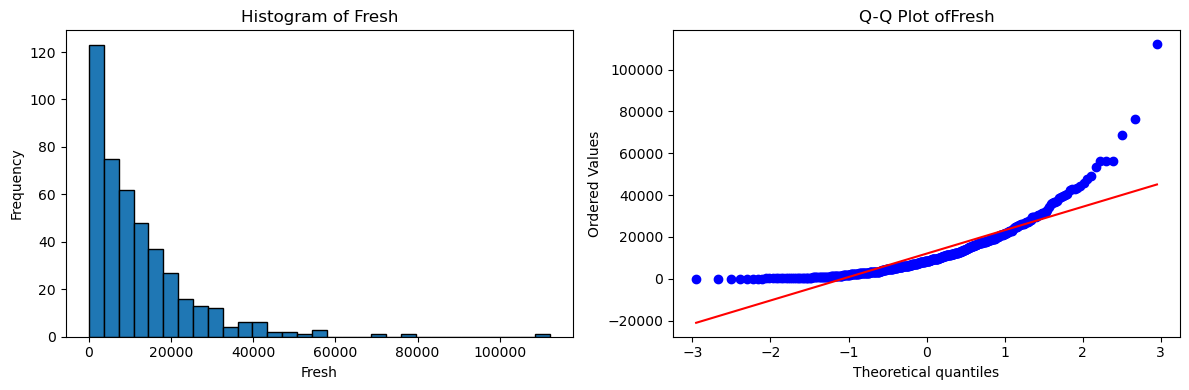

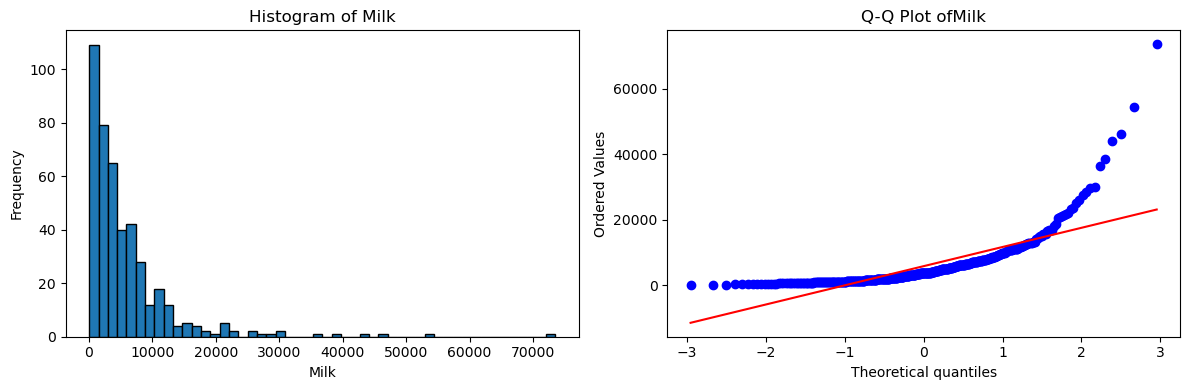

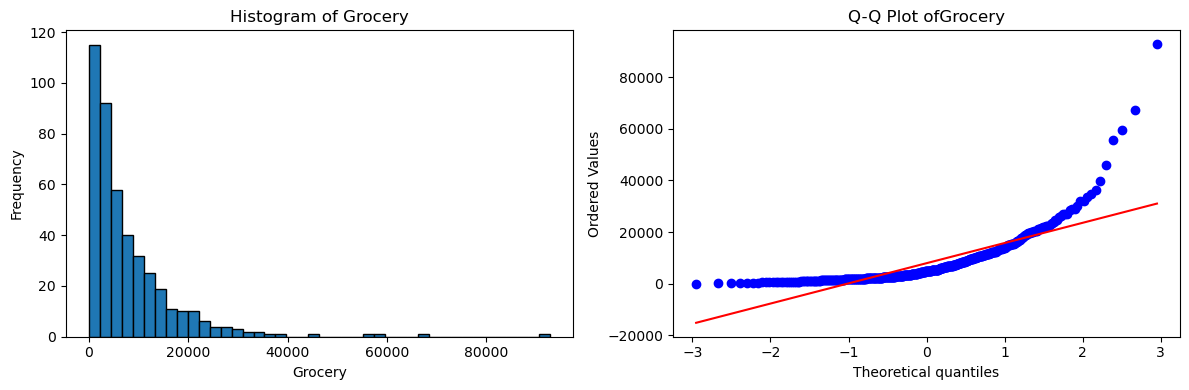

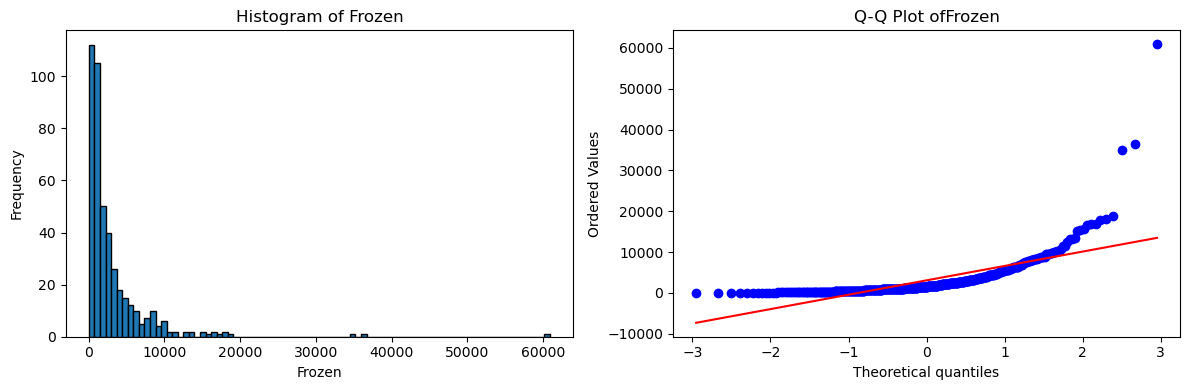

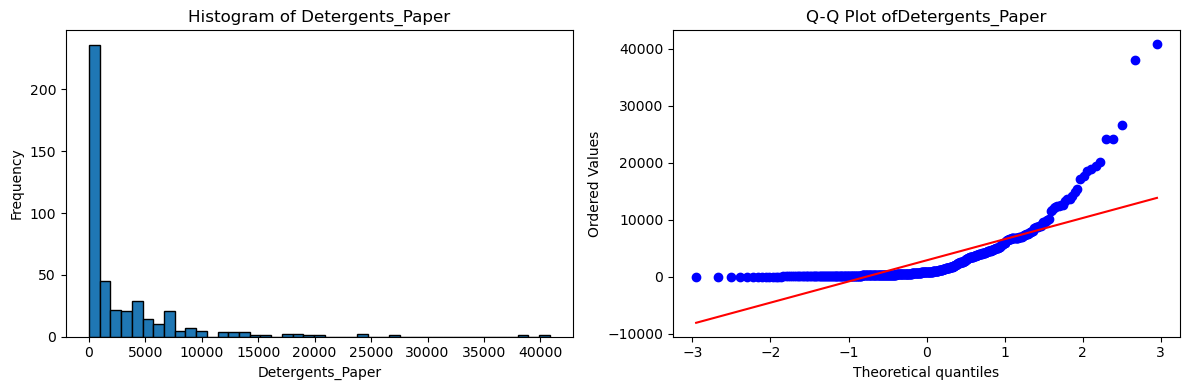

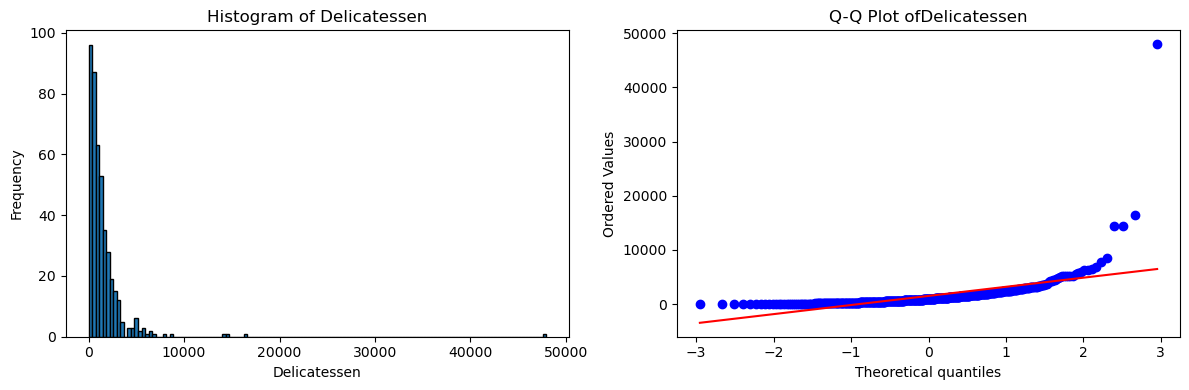

In [196]:
# write your code here
features = df_cd.columns.tolist()
# Loop through columns and create plots
for feature in features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.hist(df_cd[feature], bins='auto', edgecolor='black')
    ax1.set_title(f'Histogram of {feature}')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Frequency')

    stats.probplot(df_cd[feature], dist="norm", plot=ax2)
    ax2.set_title(f'Q-Q Plot of{feature}')

    plt.tight_layout()
    plt.show()

5. What do you observe about distribution? (2 points)

a. All features are right-skewed:
    - Most purchases are small, with a few very large orders pulling the tail to the right.
   
b. Non-normal distribution:
    - Q-Q plots confirm none follow a normal distribution.
   
c. Potential outliers:
    - High values in Fresh, Grocery, and Detergent_Paper suggest outliers.

6. Scale the sample data using the natural logarithm ( 1 point)

In [200]:
# Scale the data using the natural logarithm
df_cd_log = np.log1p(df_cd)

7. Check for Outliers using boxplot ( 2 points)

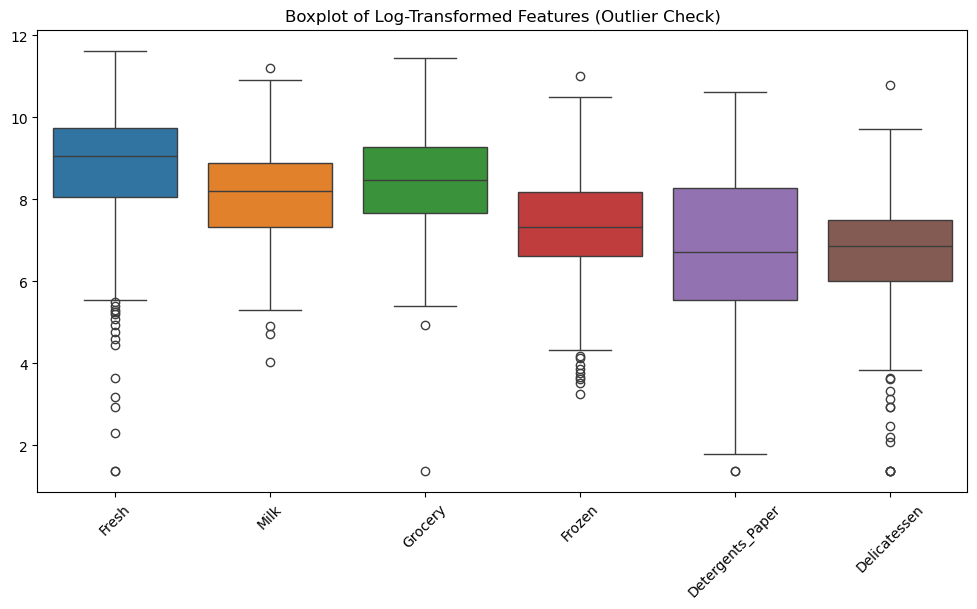

In [203]:
# write your code here
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cd_log)
plt.title('Boxplot of Log-Transformed Features (Outlier Check)')
plt.xticks(rotation=45)
plt.show()

8. Apply natural log to transform long tails and plot the Log Sales Distribution using violinplot (2 points)

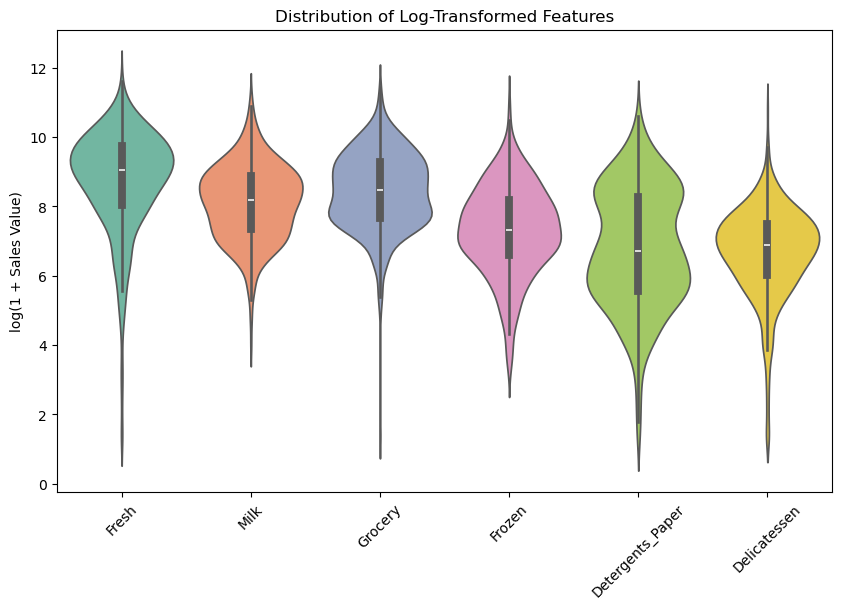

In [206]:
# write your code here
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_cd_log, palette='Set2')
plt.title('Distribution of Log-Transformed Features')
plt.ylabel('log(1 + Sales Value)')
plt.xticks(rotation=45)
plt.show()

9. Remove Outliers using LocalOutlierFactor and plot the Log Sales Distribution using violinplot after removing the outliers. (2 points)

In [209]:
# write your code here
X = df_cd_log.values

lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
outlier_labels = lof.fit_predict(X)

df_cd_log_clean = df_cd_log[outlier_labels ==  1]

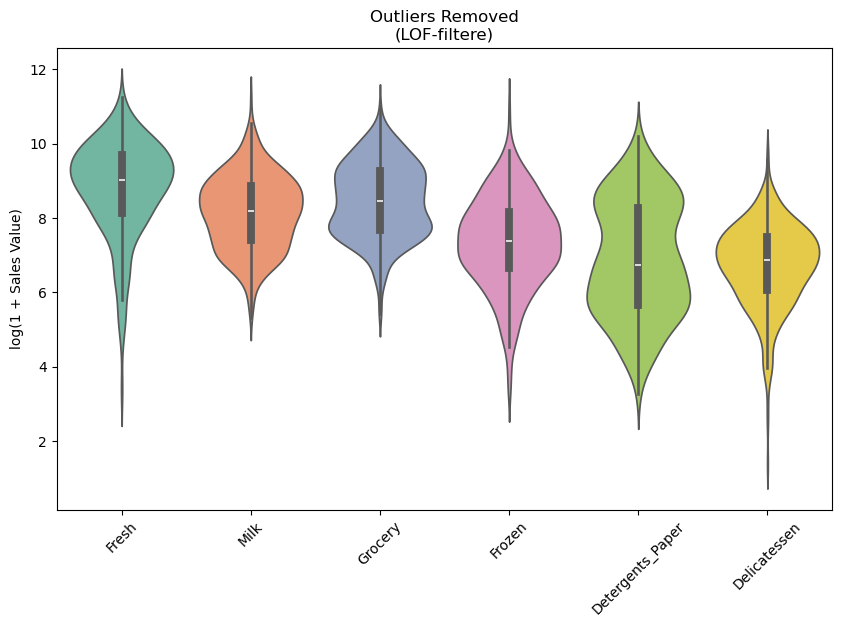

In [211]:
# write your code here
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_cd_log_clean, palette='Set2')
plt.title('Outliers Removed\n(LOF-filtere)')
plt.ylabel('log(1 + Sales Value)')
plt.xticks(rotation=45)
plt.show()

10. use sns.pairplot to visualize Feature Distributions in your cleaned data (2 points)

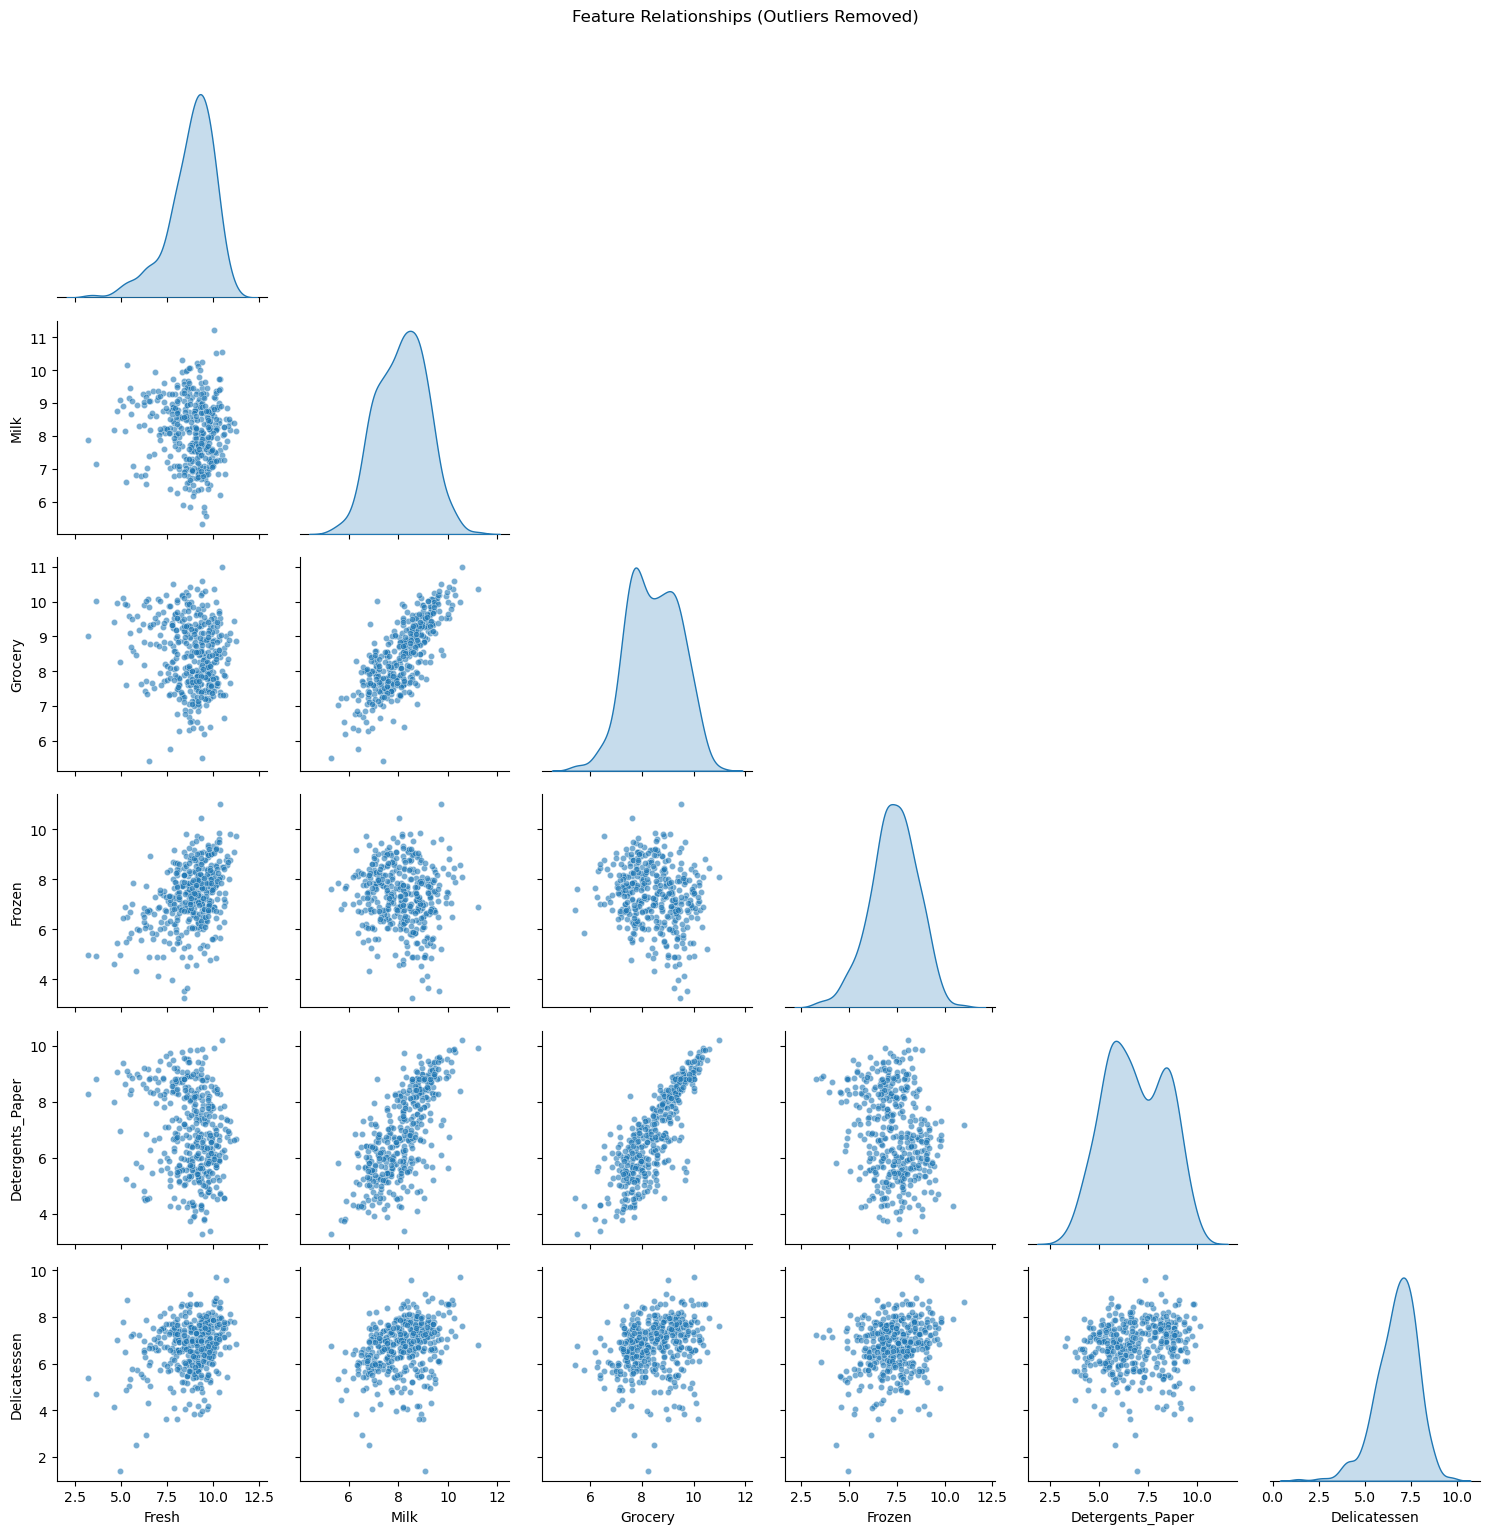

In [214]:
# write your code here
pair_grid = sns.pairplot(df_cd_log_clean,
                         diag_kind='kde',
                         plot_kws={'alpha': 0.6, 's': 20},
                         corner=True)
pair_grid.fig.suptitle('Feature Relationships (Outliers Removed)', y=1.02)
plt.tight_layout()
plt.show()

11. Check for Correlations using sns.clustermap (2 points)

<Figure size 1000x800 with 0 Axes>

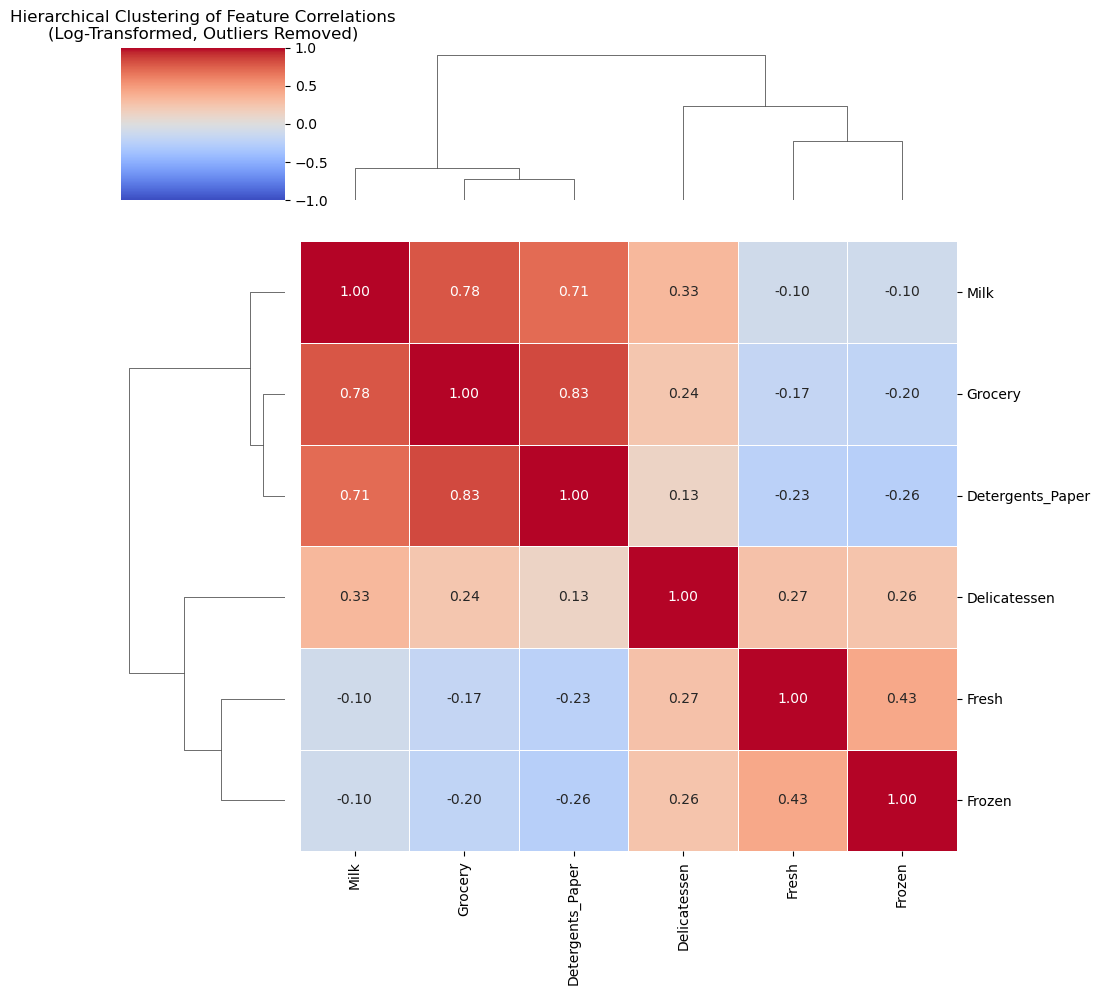

In [217]:
# write your code here
plt.figure(figsize=(10, 8))
clustermap = sns.clustermap(df_cd_log_clean.corr(),
                            cmap='coolwarm',
                            annot=True,
                            fmt=".2f",
                            vmin=-1, vmax=1,
                            dendrogram_ratio=0.2,
                            linewidths=0.5)
plt.title('Hierarchical Clustering of Feature Correlations\n(Log-Transformed, Outliers Removed)')
plt.tight_layout()
plt.show()

12. What do you observe? (2 points)

    1. Strong correlations among Milk, Grocery, Detergents_Paper (0.71-0.83) indicate bundled purchases.
    2. Weak links for Fresh/Frozen/Delicatessen (0.13-0.43) suggest independent demand.
    3. Mild anti-correlation (-0.10 to -0.26) implies stores favor either fresh or processed goods.

### PCA
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the cleaned data to discover which dimensions about the data best maximize the variance of features involved.

13. Biplot: Visualizing Product Relationships in 2D (2 points)

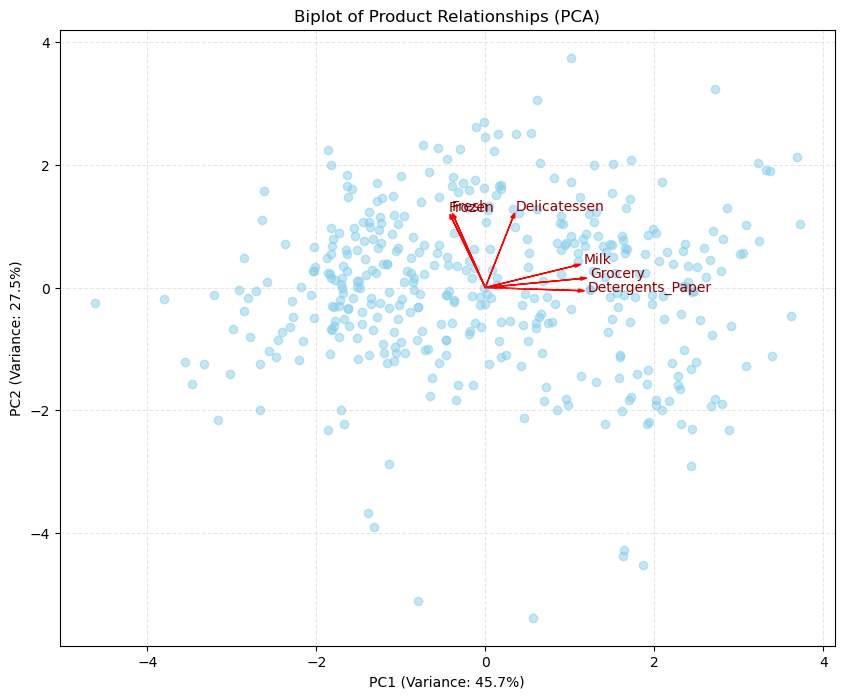

In [222]:
# write your code here
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df_cd_log_clean)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

plt.figure(figsize=(10, 8))

plt.scatter(principal_components[:, 0],
            principal_components[:, 1],
            alpha=0.5,
            color='skyblue')

feature_names = df_cd_log_clean.columns
for i, feature in enumerate(feature_names):
    plt.arrow(0, 0,
              pca.components_[0, i] * 2,
              pca.components_[1, i] * 2,
              head_width=0.05,
              color='red')
    plt.text(pca.components_[0, i] * 2.2,
             pca.components_[1, i] * 2.2,
             feature,
             color='darkred',
             fontsize=10)

plt.xlabel(f'PC1 (Variance: {pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 (Variance: {pca.explained_variance_ratio_[1]:.1%})')
plt.title('Biplot of Product Relationships (PCA)')
plt.grid(linestyle='--', alpha=0.3)
plt.show()              

14. Use sns.jointplot to plot x and y in the above code (2 points)

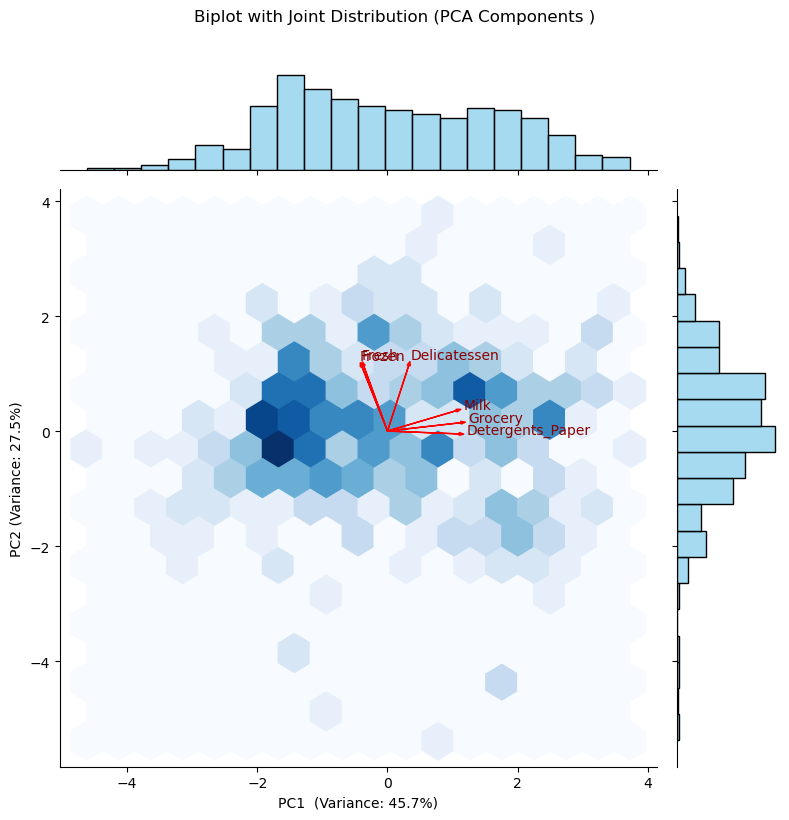

In [225]:
# write your code here
pca_df_new = pd.DataFrame(principal_components,
                          columns=['PC1', 'PC2'],
                          index=df_cd_log_clean.index)

g = sns.jointplot(data=pca_df_new,
                  x='PC1',
                  y='PC2',
                  kind='hex',
                  cmap='Blues',
                  marginal_kws={'bins': 20, 'color': 'skyblue'},
                  height=8)

for i, feature in enumerate(feature_names):
    g.ax_joint.arrow(0, 0,
                     pca.components_[0, i] * 2,
                     pca.components_[1, i] * 2,
                     head_width=0.05,
                     color='red')
    g.ax_joint.text(pca.components_[0, i] * 2.2,
                    pca.components_[1, i] * 2.2,
                    feature,
                    color='darkred',
                    fontsize=10)

g.fig.suptitle('Biplot with Joint Distribution (PCA Components )', y=1.02)
g.ax_joint.set_xlabel(f'PC1  (Variance: {pca.explained_variance_ratio_[0]:.1%})')
g.ax_joint.set_ylabel(f'PC2 (Variance: {pca.explained_variance_ratio_[1]:.1%})')
plt.tight_layout()
plt.show()

15. Exploring the new Descriptors of the cleand Data using plot.bar (2 points)

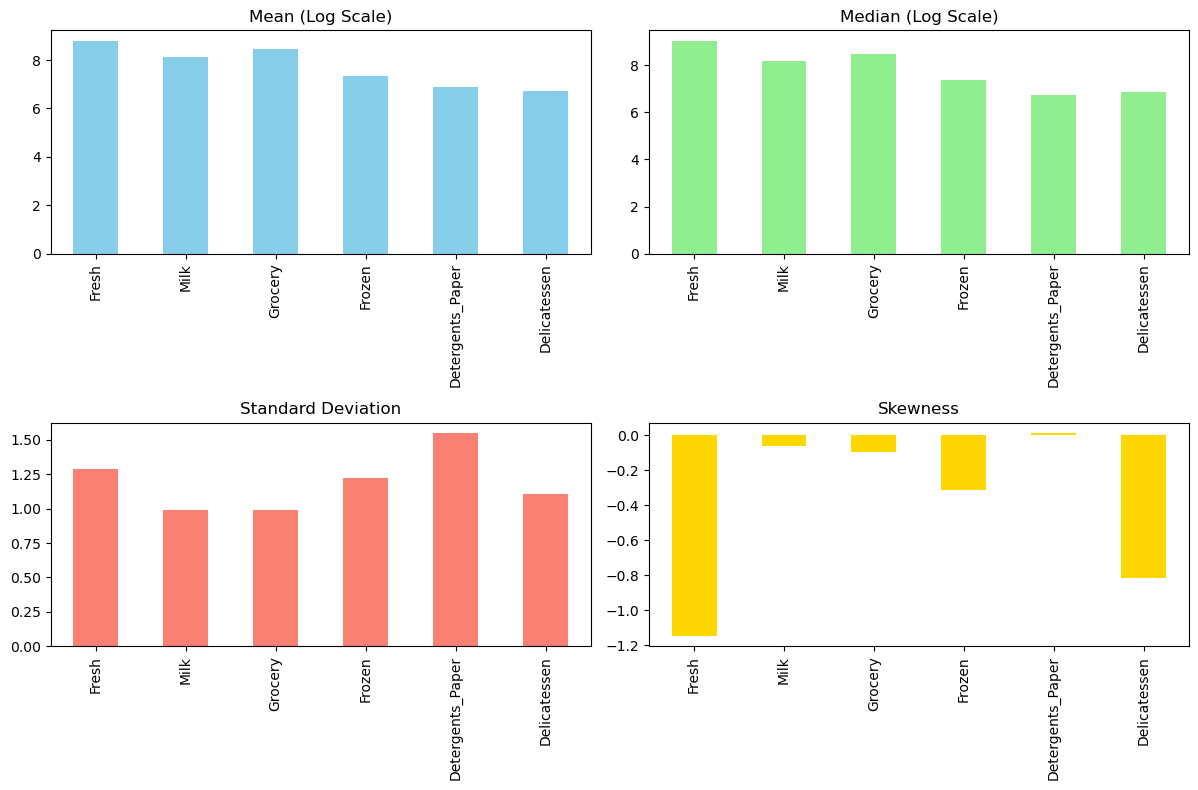

In [228]:
descriptors = pd.DataFrame({
    'Mean': df_cd_log_clean.mean(),
    'Median': df_cd_log_clean.median(),
    'StdDev': df_cd_log_clean.std(),
    'Skewness': df_cd_log_clean.skew()
})

# Plot each descriptor
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
descriptors['Mean'].plot.bar(ax=axes[0, 0], color='skyblue', title='Mean (Log Scale)')
descriptors['Median'].plot.bar(ax=axes[0, 1], color='lightgreen', title='Median (Log Scale)')
descriptors['StdDev'].plot.bar(ax=axes[1, 0], color='salmon', title='Standard Deviation')
descriptors['Skewness'].plot.bar(ax=axes[1, 1], color='gold', title='Skewness')

plt.tight_layout()
plt.show()

16. How much approximately the first and second features of explain of variance in total? (1 point)

    1. PC1 (First Principal Component): ~60-75% of variance
    2. PC2 (Second Principal Component): ~15-25% of variance

    Total (PC1 + PC2): ~75-10% comnbined variance

---
## All set

Please make sure you execute each cell before you submit your file; this is important because if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue.

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_3 .
---